In [42]:
#creating a column name
col_name=['Class','AGE','SEX','STERIOD','ANTIVIRALS',
             'FATIGUE','MALAISE','ANOREXIA','LIVER BIG',
             'LIVER FIRM','SPLEEN PALPABLE','SPIDERS',
             'ASCITES','VARICES','BILRUBIN','ALK PHOSPHATE',
             'SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [43]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/Jcharis/data-science-projects/master/Dsc-Project-Hepatitis_Mortality_Prediction/data/hepatitis.data',
                  names=col_name)

In [45]:
df.dtypes

Class               int64
AGE                 int64
SEX                 int64
STERIOD            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILRUBIN           object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In [46]:
#Replace ? with 0
df=df.replace('?',0)

In [47]:
df

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [48]:
sum(df.dtypes=='object')

15

In [49]:
#coverting from one data to another
df.columns[df.dtypes=='object']

Index(['STERIOD', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILRUBIN',
       'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME'],
      dtype='object')

In [50]:
df[['STERIOD', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
       'ALK PHOSPHATE', 'SGOT', 'PROTIME']]=df[['STERIOD', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
       'ALK PHOSPHATE', 'SGOT', 'PROTIME']].astype(int)

In [51]:
df.dtypes

Class               int64
AGE                 int64
SEX                 int64
STERIOD             int32
ANTIVIRALS          int64
FATIGUE             int32
MALAISE             int32
ANOREXIA            int32
LIVER BIG           int32
LIVER FIRM          int32
SPLEEN PALPABLE     int32
SPIDERS             int32
ASCITES             int32
VARICES             int32
BILRUBIN           object
ALK PHOSPHATE       int32
SGOT                int32
ALBUMIN            object
PROTIME             int32
HISTOLOGY           int64
dtype: object

In [52]:
df[['BILRUBIN','ALBUMIN']]=df[['BILRUBIN','ALBUMIN']].astype(float)

In [53]:
df.dtypes

Class                int64
AGE                  int64
SEX                  int64
STERIOD              int32
ANTIVIRALS           int64
FATIGUE              int32
MALAISE              int32
ANOREXIA             int32
LIVER BIG            int32
LIVER FIRM           int32
SPLEEN PALPABLE      int32
SPIDERS              int32
ASCITES              int32
VARICES              int32
BILRUBIN           float64
ALK PHOSPHATE        int32
SGOT                 int32
ALBUMIN            float64
PROTIME              int32
HISTOLOGY            int64
dtype: object

#Narative
*Most of the data was in object
*Two of the data was in float

In [54]:
df.shape

(155, 20)

In [55]:
df.isnull().sum()

Class              0
AGE                0
SEX                0
STERIOD            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILRUBIN           0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

# EDA

#Decriptive Analystics

In [56]:
#getting statistical data
df.describe()

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [57]:
#getting the information about data
df['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [58]:
target_label={'Die':1,'Live':2}


<AxesSubplot:>

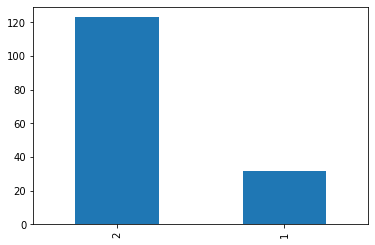

In [59]:
#ploting the graph
df['Class'].value_counts().plot(kind='bar')

In [60]:
### How many are males an females
df['SEX'].unique()

array([2, 1], dtype=int64)

In [61]:
df['SEX'].value_counts()

1    139
2     16
Name: SEX, dtype: int64

<AxesSubplot:>

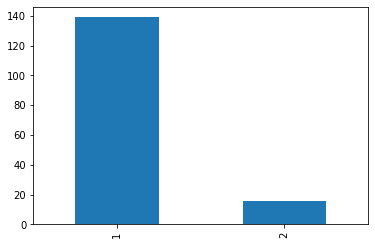

In [62]:
#looking ploting the data
df['SEX'].value_counts().plot(kind='bar')

* There are more males than females in dataset

In [63]:
#Age Range
df.groupby(['AGE','SEX']).size()

AGE  SEX
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

####Frequency Distribution table using the age range


In [64]:
df['AGE'].max()

78

In [65]:
df['AGE'].min()

7

In [66]:
labels=['Less than 10','10-20','20-30','30-40',
      '40-50','50-60','70 and more']
bins=[0,10,20,30,40,50,60,70]
freq_df=df.groupby(pd.cut(df['AGE'],bins=bins,labels=labels)).size()

In [67]:
freq_df

AGE
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
70 and more     11
dtype: int64

In [68]:
freq_df=freq_df.reset_index(name='count')

In [69]:
freq_df

,AGE,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,70 and more,11


<AxesSubplot:>

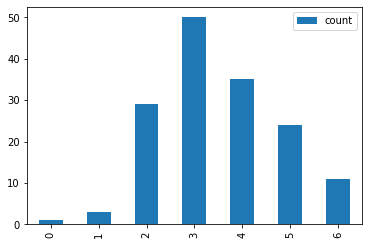

In [70]:
freq_df.plot(kind='bar')

<AxesSubplot:>

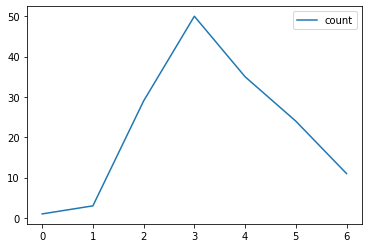

In [71]:
freq_df.plot(kind='line')

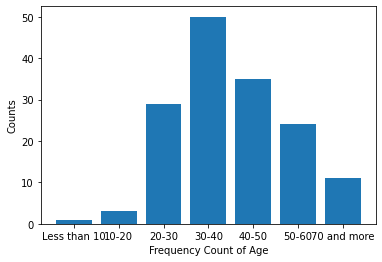

In [72]:
#Plot of freq table
plt.bar(freq_df['AGE'],freq_df['count'])
plt.ylabel('Counts')
plt.xlabel('Frequency Count of Age')
plt.show()

### Narative
* Highest prevalence of Hepatitis is from 30-40 followed  by 40-50

* The least is individual under 10, and elderl above 70

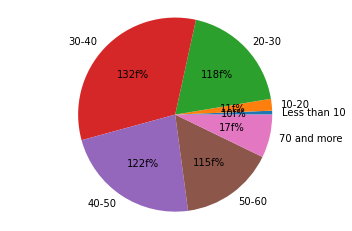

In [73]:
#Pie Chart
label=['lt-10','10-20','20-30','30-40','40-50','50-60','60-70',
      'ge-70']

#Creating pie plot 
fig1,ax1=plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1df%%')
ax1.axis('equal')
plt.show()

### Checking for outliers
+Univariante Analysis
+Multivariante Analysis

+Boxplot(Uni)
+Scatterplot (multi)
+z-Score
+IQR InterquartileRange

In [74]:
#Using boxplot for Univariate Outlier Detection
import seaborn as sns


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

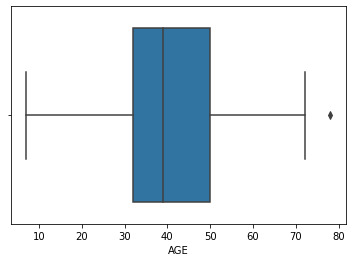

In [75]:
sns.boxplot(df['AGE'])

In [76]:
df[df['AGE']==78]

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STERIOD'>

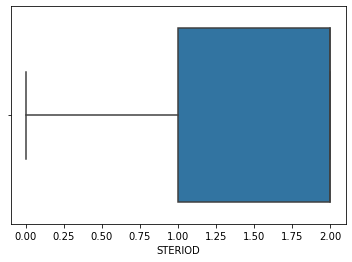

In [77]:
sns.boxplot(df['STERIOD'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='ALBUMIN'>

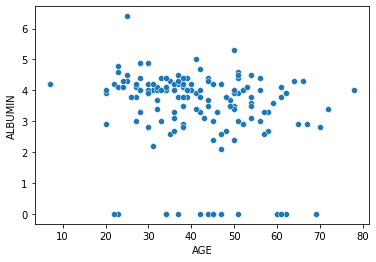

In [78]:
#Scatterplot
sns.scatterplot(df['AGE'],df['ALBUMIN'])

<AxesSubplot:xlabel='ALBUMIN', ylabel='AGE'>

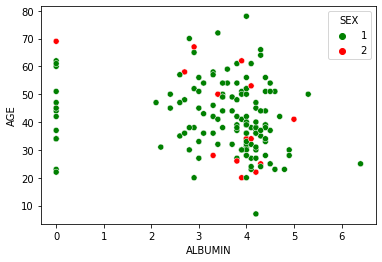

In [79]:
#Scatter plot
sns.scatterplot(x=df['ALBUMIN'],y=df['AGE'],hue=df['SEX'],palette=['green','red'],data=df)

### Using Interquartile Range(IQR)
+ H-Spread/Mid_Spread
+Measures the statistical dispersion/spread
+IQR =Quantile 3(75)-Quantile 1(25)


In [80]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)


In [81]:
IQR=q3-q1

In [83]:
### Get the actual datapoint that is an outlier
(df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


+The data points with true are the outlier

#####Solution
+Remove
+Change
+Ignore

In [89]:
df_no_outlier=df[-(df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)).any(axis=1)]

In [93]:
df_no_outlier

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,30,2,1,2.0,2,2,2.0,NaN,2,2.0,2,2.0,2.0,1.0,85,18,4.0,0,1
1,2.0,50,1,1,2.0,1,2,2.0,NaN,2,2.0,2,2.0,2.0,0.9,135,42,3.5,0,1
2,2.0,78,1,2,2.0,1,2,2.0,2.0,2,2.0,2,2.0,2.0,0.7,96,32,4.0,0,1
3,2.0,31,1,0,NaN,2,2,2.0,2.0,2,2.0,2,2.0,2.0,0.7,46,52,4.0,80,1
4,2.0,34,1,2,2.0,2,2,2.0,2.0,2,2.0,2,2.0,2.0,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,NaN,46,1,2,2.0,1,1,NaN,2.0,2,2.0,1,NaN,NaN,7.6,0,242,3.3,50,2
151,2.0,44,1,2,2.0,1,2,2.0,2.0,1,2.0,2,2.0,2.0,0.9,126,142,4.3,0,2
152,2.0,61,1,1,2.0,1,1,2.0,NaN,1,2.0,1,2.0,2.0,0.8,75,20,4.1,0,2
153,2.0,53,2,1,2.0,1,2,2.0,2.0,2,NaN,1,2.0,NaN,1.5,81,19,4.1,48,2


In [91]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(155, 20)


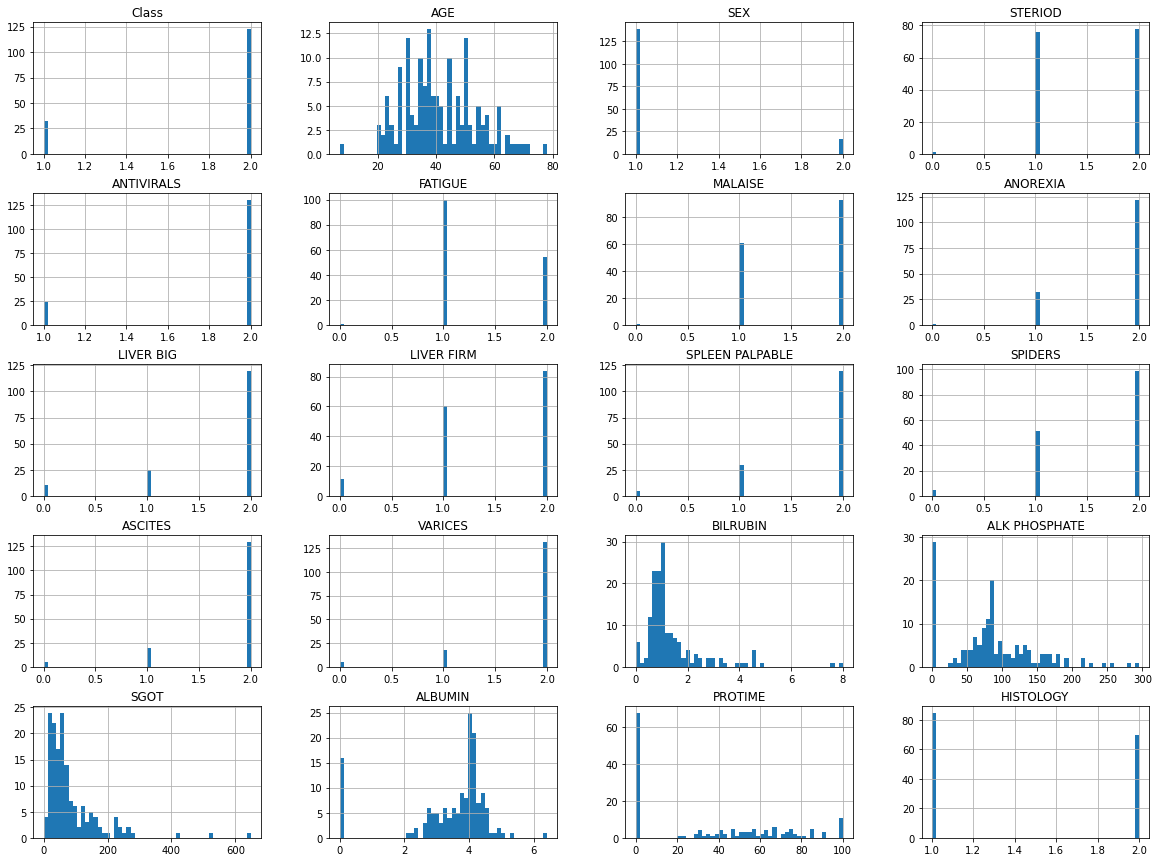

In [96]:
####Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

##### Feature Selection and Importance
+selectkbest
    -Strong relation with the output/target
+Recursive Feature Elimination 
    -

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [99]:
#Feature and Label
df.head()

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [100]:
df.columns

Index(['Class', 'AGE', 'SEX', 'STERIOD', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [101]:
xfeatures=df[['AGE', 'SEX', 'STERIOD', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY']]

In [103]:
ylabels=df['Class']

In [105]:
#Using Skbest
skb=SelectKBest(score_func=chi2,k=10)
best_feature_fit=skb.fit(xfeatures,ylabels)

In [108]:
print('Scores',best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [109]:
bf_02=best_feature_fit.transform(xfeatures)


In [110]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [112]:
#Mapping to Feature Name
feature_scores=pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [113]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [116]:
feature_column_names=pd.DataFrame(xfeatures.columns,columns=['Feature_name'])

best_feat_df=pd.concat([feature_scores,feature_column_names],axis=1)

In [117]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,AGE
1,0.389483,SEX
2,0.399513,STERIOD
3,0.186342,ANTIVIRALS
4,2.346432,FATIGUE
5,2.468032,MALAISE
6,0.196481,ANOREXIA
7,0.316982,LIVER BIG
8,0.986710,LIVER FIRM
9,0.745352,SPLEEN PALPABLE


In [119]:
#Get the best
#The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,PROTIME
15,47.388208,SGOT
13,30.102472,BILRUBIN
0,28.474819,AGE
14,17.882705,ALK PHOSPHATE
16,6.873186,ALBUMIN
10,3.189408,SPIDERS
18,3.018547,HISTOLOGY
5,2.468032,MALAISE
4,2.346432,FATIGUE


####Recursive feature elimination


In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [137]:
logis=LogisticRegression()

In [147]:
rfe=RFE(logis,n_features_to_select=8)

In [151]:
rfe_fit=rfe.fit(xfeatures,ylabels)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [152]:
selected_features=pd.DataFrame(rfe_fit.support_,columns=['Selected Features'])
ranking_features=pd.DataFrame(rfe_fit.ranking_,columns=['ranking_features'])

In [165]:
rfe_feature_df=pd.concat([feature_column_names,selected_features,ranking_features],axis=1)

In [166]:
rfe_feature_df

,Feature_name,Selected Features,ranking_features
0,AGE,False,9
1,SEX,True,1
2,STERIOD,False,5
3,ANTIVIRALS,False,8
4,FATIGUE,True,1
5,MALAISE,True,1
6,ANOREXIA,True,1
7,LIVER BIG,False,4
8,LIVER FIRM,False,6
9,SPLEEN PALPABLE,False,7


#### Narative
+RFE  we wil eliminate the lowest ranking or true

#### Checking for feature importance
+ExtraTreeClassifier

+Which feature is important 

In [167]:
from sklearn.ensemble import ExtraTreesClassifier

In [168]:
#Init
et_clf=ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [171]:
#print import
print(et_clf.feature_importances_)

[0.05997366 0.02295631 0.02979337 0.00960824 0.03077558 0.05328812
 0.029502   0.0390326  0.05074922 0.03610839 0.07879808 0.08046768
 0.0531923  0.0995645  0.07040728 0.04962284 0.08440865 0.05571766
 0.0660335 ]


In [173]:
feature_importance_df=pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [174]:
feature_importance_df

AGE                0.059974
SEX                0.022956
STERIOD            0.029793
ANTIVIRALS         0.009608
FATIGUE            0.030776
MALAISE            0.053288
ANOREXIA           0.029502
LIVER BIG          0.039033
LIVER FIRM         0.050749
SPLEEN PALPABLE    0.036108
SPIDERS            0.078798
ASCITES            0.080468
VARICES            0.053192
BILRUBIN           0.099565
ALK PHOSPHATE      0.070407
SGOT               0.049623
ALBUMIN            0.084409
PROTIME            0.055718
HISTOLOGY          0.066034
dtype: float64

<AxesSubplot:>

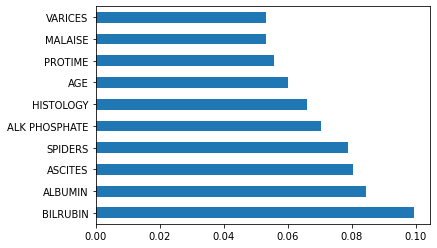

In [176]:
feature_importance_df.nlargest(10).plot(kind='barh')

##### Narative
+All the methods gave us almost the same feature to use

In [178]:
#correlation
df.corr()

,Class,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
SEX,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
STERIOD,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
ANTIVIRALS,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
FATIGUE,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
MALAISE,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
ANOREXIA,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
LIVER BIG,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
LIVER FIRM,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<AxesSubplot:>

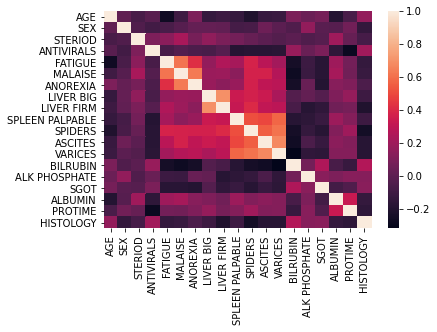

In [179]:
#Heatap for Correlation
sns.heatmap(xfeatures.corr())

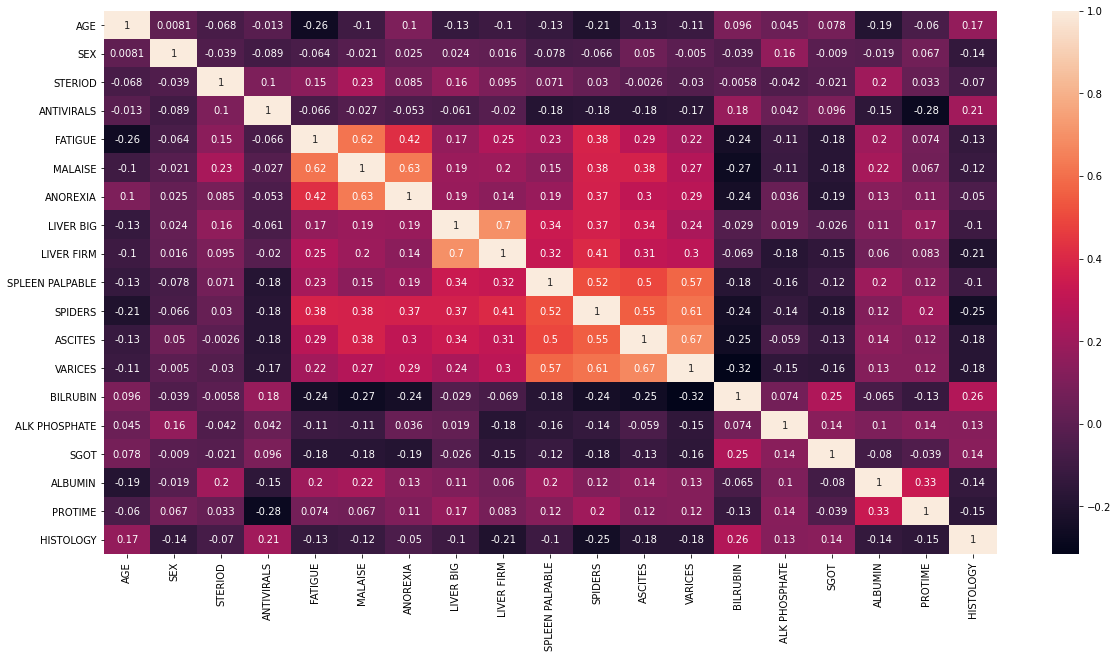

In [182]:
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

####Model Building
+LogisticRegression
+RF
+DCT

+Features &Labels
+Train/Test/Split

In [184]:
#ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [185]:
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [186]:
df.columns

Index(['Class', 'AGE', 'SEX', 'STERIOD', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [187]:
xfeatures

,AGE,SEX,STERIOD,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [190]:
ylabels=df['Class']
ylabels

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 155, dtype: int64

In [191]:
xfeatures_best=df[['AGE','SEX','STERIOD','ANTIVIRALS',
             'FATIGUE','MALAISE','ANOREXIA','LIVER BIG',
             'LIVER FIRM','SPLEEN PALPABLE','SPIDERS',
             'ASCITES','VARICES','BILRUBIN','ALK PHOSPHATE',
             'SGOT','ALBUMIN','PROTIME','HISTOLOGY']]

In [193]:
x_train,x_test,y_train,y_test=train_test_split(xfeatures_best,
                                              ylabels,test_size=0.7)

In [194]:
logreg=LogisticRegression()

In [195]:
logreg.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
#Model Accuracy
#Method
logreg.score(x_test,y_test)

0.8440366972477065

In [197]:
#Method 2
logreg.predict(x_test)

array([2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2],
      dtype=int64)

In [198]:
print(list(y_test))

[2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1]


In [200]:
accuracy_score(y_test,logreg.predict(x_test))

0.8440366972477065

### Alternative Algorithms

In [201]:
clf=DecisionTreeClassifier()

In [202]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [203]:
clf.score(x_test,y_test)

0.7981651376146789

In [204]:
ran=RandomForestClassifier()

In [205]:
ran.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
ran.score(x_test,y_test)

0.8348623853211009

In [207]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [208]:
knn=KNeighborsClassifier(n_neighbors=3)

In [209]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [210]:
knn.score(x_test,y_test)

0.6513761467889908

In [211]:
knn.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

###Save our model
+Serialization
+Pickle
+Joblib
+numpy/json/ray

In [212]:
import joblib


In [214]:
model_file=open('logistic_regression_hep8_model.pkl','wb')
joblib.dump(logreg,model_file)
model_file.close()

In [217]:
model_file_dt=open('Decision_tree_hep8_model.pkl','wb')
joblib.dump(clf,model_file_dt)
model_file.close()

In [218]:
model_file_rf=open('Random_Forest_hep8_model.pkl','wb')
joblib.dump(ran,model_file_rf)
model_file.close()

In [219]:
model_file_knn=open('KNN_hep8_model.pkl','wb')
joblib.dump(knn,model_file_knn)
model_file.close()

In [222]:
from IPython.display import Image
from sklearn import tree


In [ ]:
pip install lime

In [ ]:
print('x')